# Plotly Library within fastpages
> How-to to make plotly working within fastpages blog.

- badges: false
- use_plotly: true
- categories: [jupyter, plotly]

There have been attempts to make [Plotly Python](https://plotly.com/python) working with [fastpages](https://fastpages.fast.ai/) (see for instance, [this](https://binnisb.github.io/blog/datascience/2020/04/02/Plotly-in-lab.html) blog post or this [discussion](https://forums.fast.ai/t/fastpages-plotly-plot-doesnt-load-js-error-in-browser/67459/9)). I have not been able to make `Plotly` working this way. Moreover I did'nt want to change my `jupyter` notebooks to take in mind that it will be latter converted by `fastpages`: basically, I want my `jupyter` to be rendered by `fastpages` without hacking.

By looking how the `Plotly` charts were rendered by the `html` pages of https://plotly.com/python website, I finally found a way to keep the code unchanged by just adding the minimal `javascript` configuration in the Jekyll part. The solution is to add several lines into the `_includes/custom-head.html` [file](https://github.com/fastai/fastpages/blob/master/_includes/custom-head.html) in such a way the minimal set of `javascript` plugins is loaded for `Plotly`. Here are the lines 

{% raw %}
```html
{% if page.use_plotly %}
<script type="text/javascript" src="https://cdnjs.cloudflare.com/ajax/libs/require.js/2.3.2/require.js"></script>
<script type="text/javascript">
  if (typeof require !== 'undefined') {
      require.undef("plotly");
      requirejs.config({
          paths: {
              'plotly': ['https://cdn.plot.ly/plotly-latest.min']
          }
      });
      require(['plotly'], function(Plotly) {
          window._Plotly = Plotly;
      });
  }
</script>
{% endif %}
```
{% endraw %}

The block itself is wrapped and is only loaded if you add `use_plotly: true` on top of your notebook (see https://github.com/fastai/fastpages#customizing-blog-posts-with-front-matter). 

---
Let's play with `Plotly` and the *gapminder* [data set](https://github.com/jennybc/gapminder)

In [8]:
# hide
import plotly.io as pio

pio.templates.default = "seaborn"

In [9]:
import plotly.express as px

gapminder = px.data.gapminder()
gapminder.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4


We can for example make a *violin* plot showing how the life expectancy change from one continent to another.

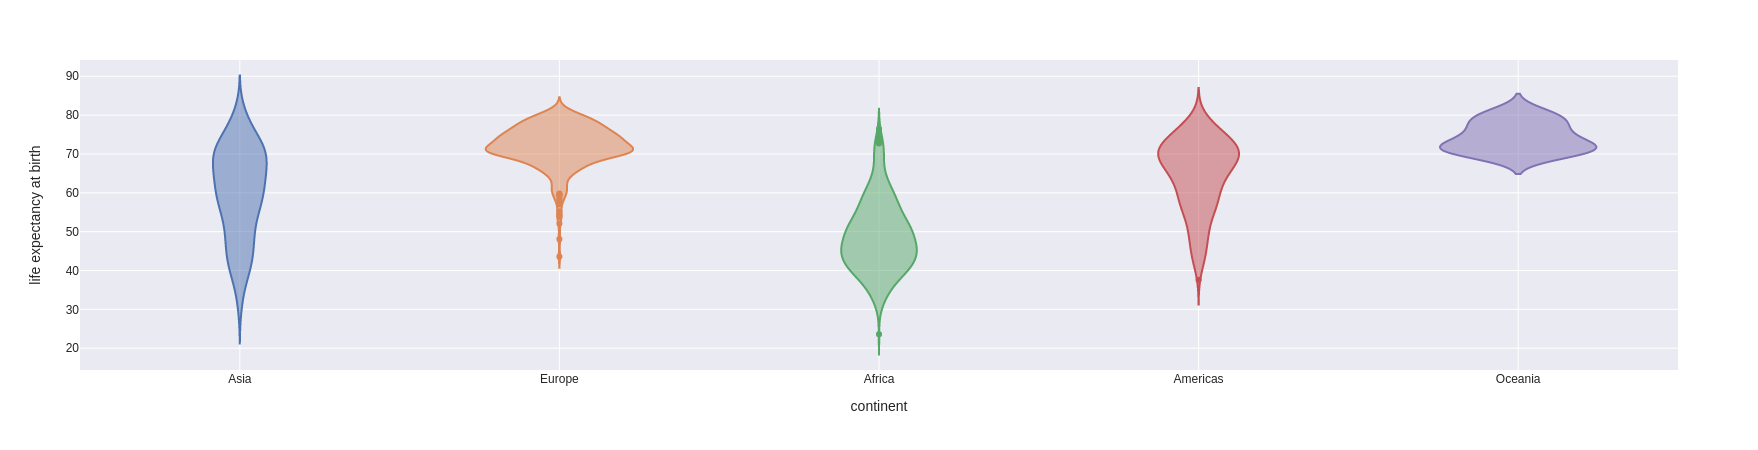

In [10]:
fig = px.violin(
    gapminder,
    x="continent",
    y="lifeExp",
    color="continent",
    labels={"lifeExp": "life expectancy at birth"},
)
fig.update_layout(showlegend=False)

We can even use the animation layer of `Plotly`

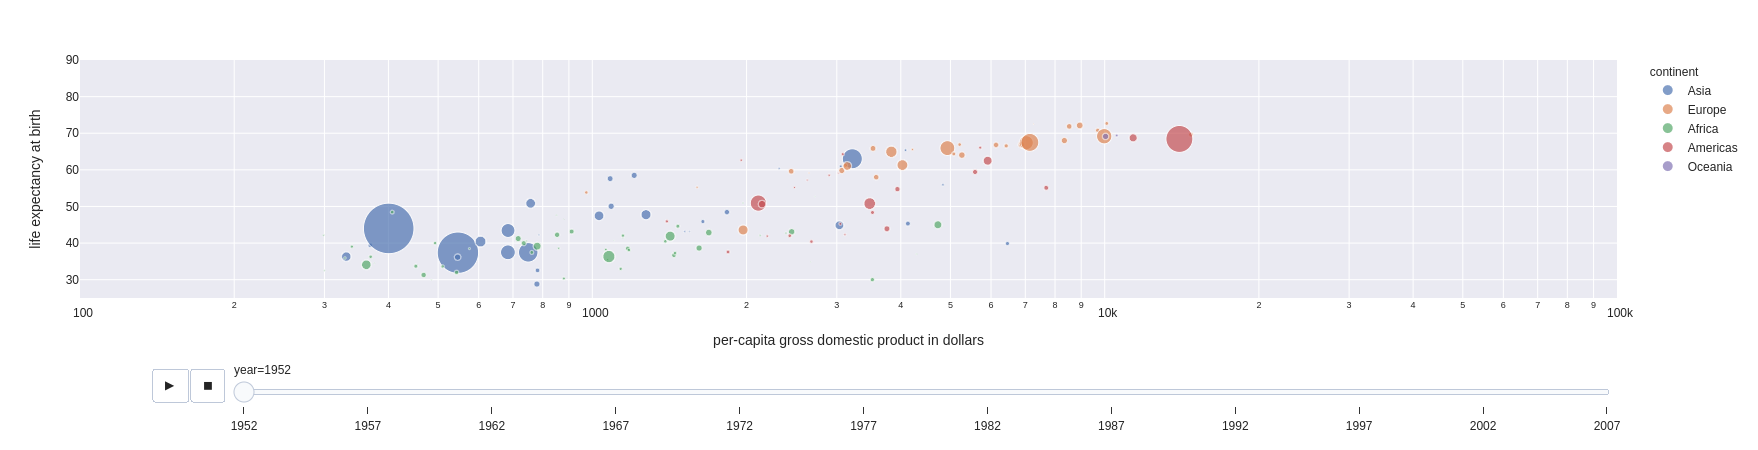

In [11]:
px.scatter(
    gapminder,
    x="gdpPercap",
    y="lifeExp",
    animation_frame="year",
    animation_group="country",
    size="pop",
    color="continent",
    hover_name="country",
    log_x=True,
    size_max=55,
    range_x=[100, 100000],
    range_y=[25, 90],
    labels={
        "lifeExp": "life expectancy at birth",
        "gdpPercap": "per-capita gross domestic product in dollars",
    },
)

Lastly, we can produce nice geographical charts

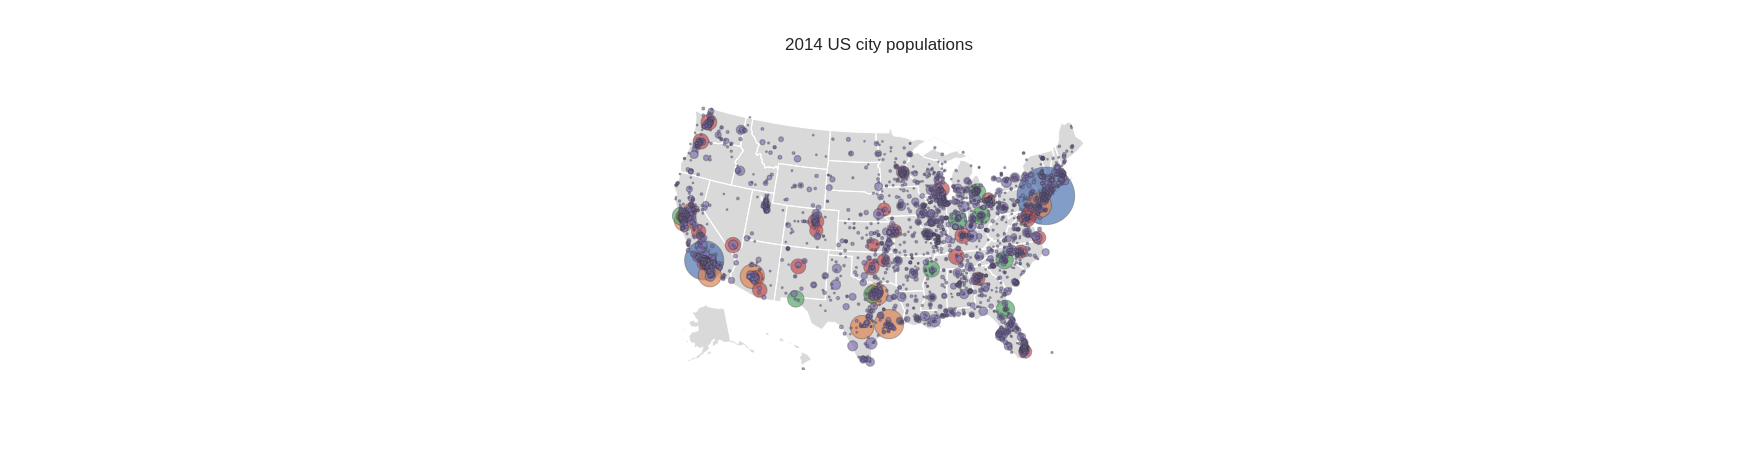

In [12]:
import pandas as pd
import plotly.graph_objects as go

df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/2014_us_cities.csv")
df["text"] = df["name"] + "<br>Population " + (df["pop"] / 1e6).astype(str) + " million"

fig = go.Figure()

limits = [(0, 2), (3, 10), (11, 20), (21, 50), (50, len(df))]
for i, limit in enumerate(limits):
    df_sub = df[limit[0] : limit[1]]
    fig.add_trace(
        go.Scattergeo(
            locationmode="USA-states",
            lon=df_sub["lon"],
            lat=df_sub["lat"],
            text=df_sub["text"],
            marker=dict(
                size=df_sub["pop"] / 5000,
                line_color="rgb(40,40,40)",
                line_width=0.5,
                sizemode="area",
            ),
        )
    )

fig.update_layout(
    title_text="2014 US city populations",
    showlegend=False,
    geo=dict(scope="usa", landcolor="rgb(217, 217, 217)"),
)